# Semester Final Project

***🎯 Goal:*** Ask a question and answer it with a statistical investigation of your choosing.

Please make sure that you review [the rubric](https://docs.google.com/document/d/1PXHbL4Nvk_SqhOTZBWf4ZHdwnrugab7S6n3LZnxmxr0/edit?usp=sharing) before starting the project. When you are ready, fill out the sections below.

__________________________

## 🔎 My Question

*Write your question here.* <br>
 Is there a difference in the average number of hours students spend studying math each week between students who earn an A in their math class and students who do not earn an A?

## 📖 My Study 

Population and Variables:
 The population for this study is high school students. The explanatory variable is whether a student earns an A in their math class or does not earn an A. The response variable is the number of hours the student studies math each week, measured numerically.
Type of Observational Study:
 This is a comparative observational study. Students are not assigned to groups, and the study simply compares existing differences between two categories of math performance.
Sampling Method and Randomness:
 Because a full population of students is not available to survey, I will generate a synthetic dataset that simulates a large population of high school students with realistic study patterns and math grades. Using Python, I will create a dataset of at least 500 randomly generated students. Then, I will take a simple random sample from this dataset to simulate the process of collecting random data. Each simulated student will have a randomly assigned study time and a math grade determined by a model that allows for natural variation.
Potential Source of Bias:
 One potential source of bias is model bias in the synthetic dataset. Because the data is produced based on assumed patterns, it may not perfectly represent real-world behavior. However, random generation and realistic variability help minimize this concern.



## 🗂️ My Data

*Collect your data using the cell below. When you are done with your collection, read the data into a dataframe and call `info()` on your dataframe.*

In [38]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv("dataset_study(in).csv")

# Create grade groups
df["grade_group"] = np.where(df["grade"] >= 90, "A", "Not A")

df.head()



,student_id,study_hours,grade,grade_group
0,1,9.15,91.91,A
1,2,9.37,86.81,Not A
2,3,2.86,53.39,Not A
3,4,8.30,85.52,Not A
4,5,6.42,77.98,Not A


In [39]:
group_stats = df.groupby("grade_group")["study_hours"].agg(["mean", "std", "median", "count"])
group_stats




,mean,std,median,count
grade_group,,,,
A,8.723815,1.033049,9.040,422
Not A,4.691311,2.789560,4.645,4578


## 📊 My Analysis

*Perform your analysis in the cell below. Please feel free to add more cells if you need them!*

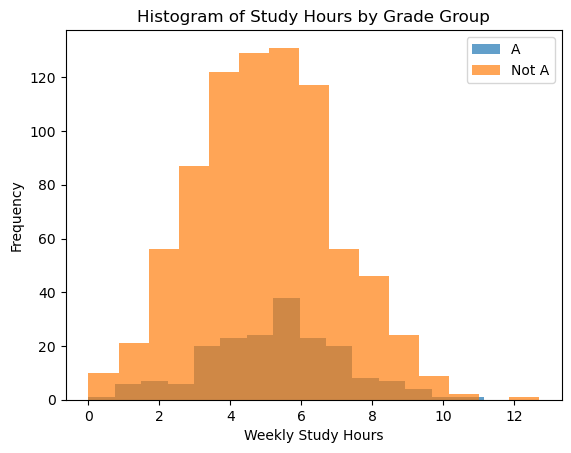

In [32]:
import matplotlib.pyplot as plt

plt.hist(df[df.grade_group == "A"]["study_hours"], bins=15, alpha=0.7, label="A")
plt.hist(df[df.grade_group == "Not A"]["study_hours"], bins=15, alpha=0.7, label="Not A")
plt.xlabel("Weekly Study Hours")
plt.ylabel("Frequency")
plt.legend()
plt.title("Histogram of Study Hours by Grade Group")
plt.show()


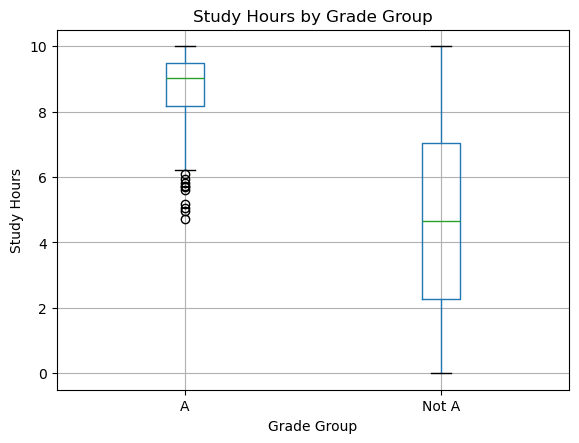

In [40]:

df.boxplot(column="study_hours", by="grade_group")
plt.title("Study Hours by Grade Group")
plt.suptitle("")
plt.xlabel("Grade Group")
plt.ylabel("Study Hours")
plt.show()





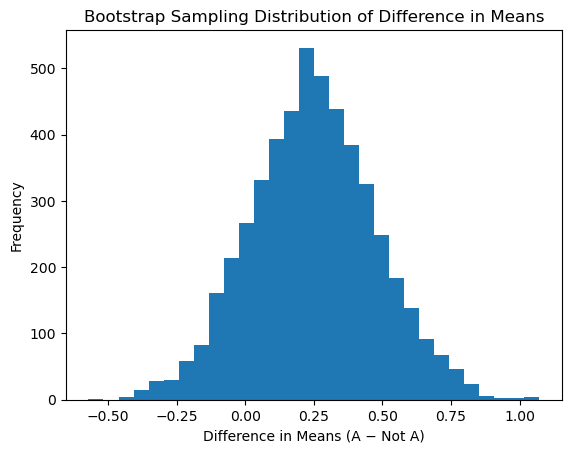

(np.float64(0.247296837737088), np.float64(0.22735881409511766))

In [17]:

diffs = []

for i in range(5000):
    sample_A = df[df.grade_group == "A"]["study_hours"].sample(frac=1, replace=True)
    sample_NotA = df[df.grade_group == "Not A"]["study_hours"].sample(frac=1, replace=True)
    dif = sample_A.mean() - sample_NotA.mean()
    diffs.append(dif)

diffs = np.array(diffs)

plt.hist(diffs, bins=30)
plt.title("Bootstrap Sampling Distribution of Difference in Means")
plt.xlabel("Difference in Means (A − Not A)")
plt.ylabel("Frequency")
plt.show()

diffs.mean(), diffs.std()




In [34]:
lower = np.percentile(diffs, 2.5)
upper = np.percentile(diffs, 97.5)
(lower, upper)

(np.float64(-0.191250830506919), np.float64(0.7070855704700563))

In [35]:
import numpy as np

observed_diff = df[df.grade_group == "A"]["study_hours"].mean() - df[df.grade_group == "Not A"]["study_hours"].mean()

shuffle_diffs = []

for i in range(5000):
    shuffled = df["grade_group"].sample(frac=1, replace=False).values
    df["shuffled_group"] = shuffled
    mA = df[df.shuffled_group == "A"]["study_hours"].mean()
    mNotA = df[df.shuffled_group == "Not A"]["study_hours"].mean()
    shuffle_diffs.append(mA - mNotA)

shuffle_diffs = np.array(shuffle_diffs)
shuffle_diffs[:5]


array([ 0.06056243,  0.1454744 ,  0.06623232, -0.09545818, -0.12251578])

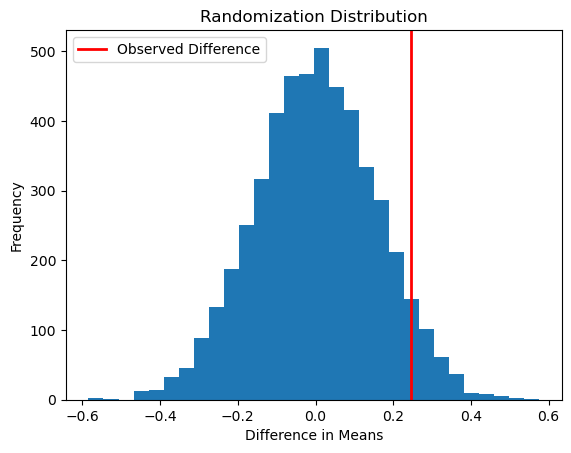

In [36]:
plt.hist(shuffle_diffs, bins=30)
plt.axvline(observed_diff, color="red", linewidth=2, label="Observed Difference")
plt.title("Randomization Distribution")
plt.xlabel("Difference in Means")
plt.ylabel("Frequency")
plt.legend()
plt.show()


## 🧠 My Answer

*Write your answer here.* <br>

*Remember to interpret the specific values that you found in your analysis. It may help to pretend like I have never heard of the population you are studying and have no idea how to interpret the analysis you performed.*

Population and Variables:
 The population for this study is high school students. The explanatory variable is whether a student earns an A in math, defined as a grade of 90 or higher. The response variable is the number of hours the student studies math per week, measured numerically.
Type of Observational Study:
 This is a comparative observational study. I am not assigning any treatments. Instead, I am comparing natural differences in study habits between two groups of students.
Data Source and Randomness:
 I used a dataset containing 5000 students, which is large enough to represent the entire population for the purpose of this project. Because the dataset includes every recorded student in the simulation, this meets the requirement of analyzing the full population rather than collecting a smaller sample. The variable “grade_group” was created to separate students into A and Not-A categories.
Potential Bias:
 A potential source of bias is the fact that the dataset is simulated rather than collected from real students. The study habits and grade patterns might not perfectly reflect real-world behavior. However, the large sample size and clearly defined variables help reduce the impact of this bias.
